In [ ]:
pip

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from arch import arch_model
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
data = yf.download('AAPL', start='2010-01-01')
df = pd.DataFrame(data)
df['Date'] = pd.to_datetime(df.index)
df.set_index('Date', inplace=True)
df.head()

[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2010-01-04,6.440331,6.455077,6.391279,6.422877,493729600
2010-01-05,6.451464,6.487877,6.417458,6.458085,601904800
2010-01-06,6.348845,6.477044,6.342224,6.451464,552160000
2010-01-07,6.337111,6.379844,6.291067,6.372320,477131200
2010-01-08,6.379241,6.379843,6.291368,6.328684,447610800


In [ ]:
df['Returns'] = df['Close'] - df['Close'].shift(1)
df['log_returns'] = np.log(df['Close']/df['Close'].shift(1))
df['Volatility_annualised'] = df['log_returns'].rolling(window=21).std() * np.sqrt(252)
df.dropna(inplace=True)

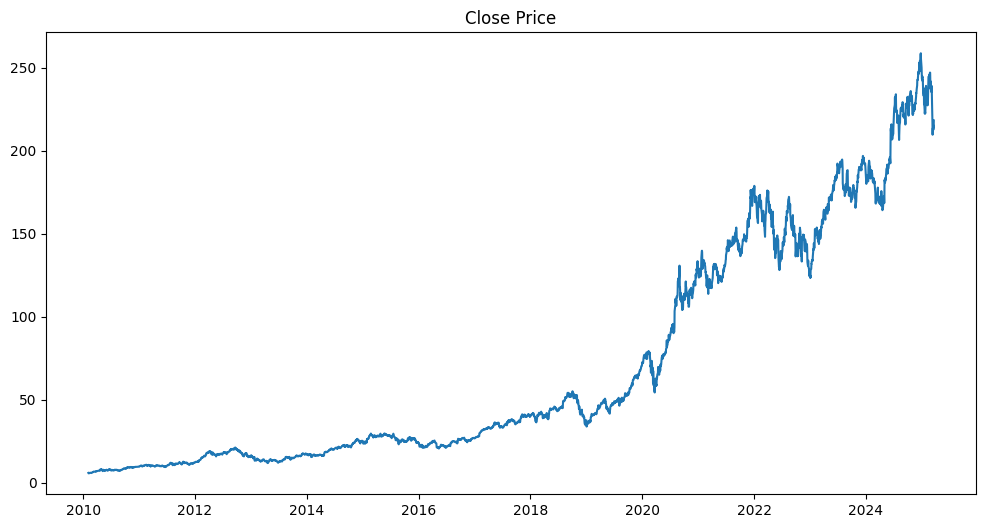

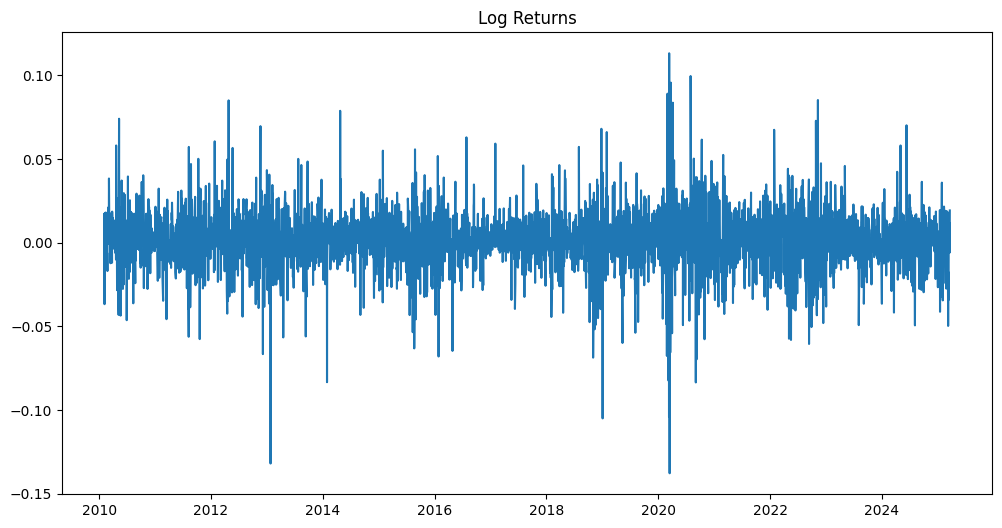

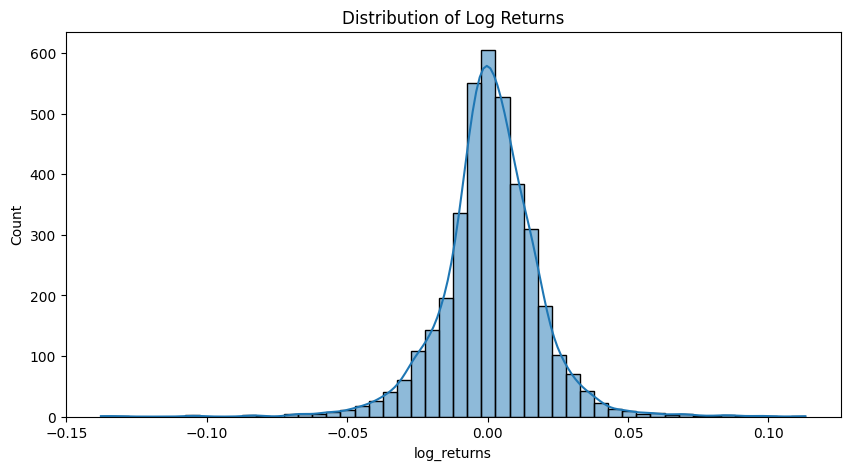

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['Close'])
plt.title("Close Price")
plt.show()

# Plot log returns
plt.figure(figsize=(12,6))
plt.plot(df.index, df['log_returns'])
plt.title("Log Returns")
plt.show()

# Histogram of log returns
plt.figure(figsize=(10,5))
sns.histplot(df['log_returns'], bins=50, kde=True)
plt.title("Distribution of Log Returns")
plt.show()